In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import pylab
import matplotlib.pyplot as plt


In [33]:
salary = pd.read_csv('/home/rulani/Downloads/salary.csv')
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


# Cleaning Data

### 1. How many responders are there? Are there any missing values in any of the variables?

In [34]:
salary.describe()
count = len(salary['salary'])
count

514

In [35]:
salary.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

#### From the results above, we can see that there are 514 observations and there is a missing value in the salary column.

### 2. What is the lowest salary and highest salary in the group?

In [36]:
salary['salary'].min()

29000.0

In [37]:
salary['salary'].max()

96156.0

#### From the results above:

#### We have the maximum salary as R96156 and
#### we have the minimum salary as R2900

### 3. What is the mean salary for the sample? Include the standard error of the mean.

In [38]:
mean_sal = salary['salary'].mean()
round(mean_sal, 2)


50863.22

In [39]:
round(stats.sem(salary['salary'], nan_policy = 'omit'), 2)


560.06

#### From the results above we have:

#### The mean salary as R50863 and the standard error of the mean salary is R560.06

### 4. What is the standard deviation for the years worked?

In [40]:
standrd = np.std(salary['yearsworked'])
standrd

9.435503224576872

#### From the results above we have:

#### The standard deviation for the years worked is 9.43 

### 5. What is the median salary for the sample?

In [41]:
np.nanmedian(salary['salary'])

50096.0

#### From the results above we have:
    
#### The median for the salaries is R5096

### 6. What is the interquartile range for salary in the sample?

In [42]:
# First quartile (Q1) 
Q1 = np.nanpercentile(salary['salary'], 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.nanpercentile(salary['salary'], 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 
  
print(IQR) 

20345.0


#### From the results above we have:
    
#### The interquartile range for the salaries is R20345

### 7. How many men are there in the sample? How many women are there in the sample? Present this information in a table.

In [43]:
clean_up = {'male':    
{    1:'Male', 
     0:'Female'
},
            
 'position':
{   1:'Junior Employee',
    2:'Manager',
    3:'Executive'
}
           }

salary.replace(clean_up, inplace=True)



In [44]:
males_sal = salary['male']== 'Male'
females_sal = salary['male']== 'Female'

gender= salary.groupby(['male'])
#gender.size()
pd.crosstab(males_sal,females_sal)


male,False,True
male,,
False,386,0
True,0,128


### 8. How many women are executives compared to men?

In [45]:
pos = salary['position']
gen = salary['male']
pd.crosstab(pos,gen)

male,Female,Male
position,,
Executive,19,192
Junior Employee,60,83
Manager,49,111


### 9. Create a histogram for the variable Salary.

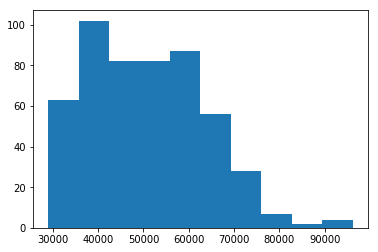

In [46]:
#salary['salary_by_hundreds'] = salary['salary'].apply(lambda x : int(x/100) * 10)

pylab.figure()
pylab.hist(salary['salary'][~np.isnan(salary['salary'])])
pylab.show()

### 10. Examine the histogram and describe the distribution for Salary.

#### From the graph above we have that:

#### The distribution of the salaries is skewed to the left, we see that the majority of the salaries lies between R3000 and R6000

### 11. Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?

In [51]:
 #fem_sal = salary['salary'].groupby(salary['male'])
# fem_sal.head()

mean_sal = salary.groupby('male')['salary'].mean()
mean_sal

std_sal = salary.groupby('male')['salary'].std()
std_sal

 female_mean_sal = mean_sal.loc['Female']
 female_mean_sal

male_mean_sal= mean_sal.loc['Male']
male_mean_sal

 female_std_sal = std_sal.loc['Male']
 Male_std_sal = std_sal.loc['Female']


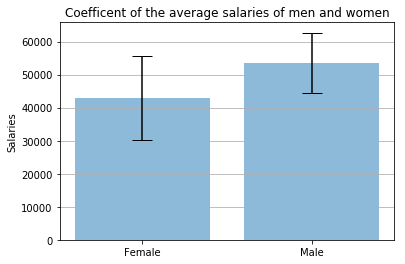

In [55]:
materials = ['Female', 'Male']
x_pos = np.arange(len(materials))
CTEs = [female_mean_sal, male_mean_sal]
error = [female_std_sal, Male_std_sal]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Salaries')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of the average salaries of men and women')
ax.yaxis.grid(True)

#Save the figure and show
#plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
plt.show()


### 12.1 Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).

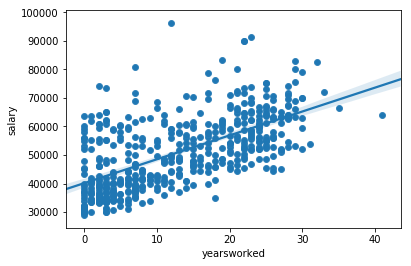

In [21]:

ax1 = salary.plot.scatter(x='yearsworked',y='salary' )

ax = sns.scatterplot(x=salary['yearsworked'], y=salary['salary'], data=salary)

ax = sns.regplot(x="yearsworked", y="salary", data=salary)



### 12.2 What is the relationship between Years Worked and Salary?

### 12.3 Describe any patterns in the scatterplot.Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)

#### We can see from the graph above that there is a positive strong relationship between the number of years worked against the salaries thereof.

### 13.1 Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.

In [57]:
salary['salary'] = salary.fillna(0)  
scipy.stats.pearsonr(salary['yearsworked'], salary['salary'])
#ax = sns.regplot(x="yearsworked", y="salary", data=salary)

(0.6069484208479918, 4.765231027446925e-53)

### 13.2 Interpret the size and direction of the correlation statistic.
### Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.

#### From the results above we have that:

#### The strength of the relationship between number of years worked and the salaries is a moderate relationship as the coefficient correlation is 0.61

#### the direction of the relationship between number of years worked and the salaries is a positive direction.

#### The p-value of the pearson correlation is 4.76 e^-53 which is less than 0.05, thus we rejust the null hypothesis. This relationship is statistically significant.